In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
"""def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    if ts_name is not None:
        ts_id = dataset.timeseries_set.all().filter(name=ts_name).first().id

    return dataset, training_dataset, ts_id"""
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [4]:
def lisa_pearson_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)
    return result

In [5]:
def lisa_dtw_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function='euclidean')
    return result

In [6]:
def lisa_geo_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score'):
    result = %timeit -o lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)
    return result

In [7]:
def rpca_detection_time_it(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)
    return result

In [8]:
def histogram_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)
    return result

In [9]:
def cluster_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    result = %timeit -o cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)
    return result

In [10]:
def svm_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    result = %timeit -o svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)
    return result

In [11]:
def isolation_forest_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    result = %timeit -o isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)
    return result

In [2]:
# Hum1 Single - TS NUMBER
dataset_name = 'Humidity'
ts_names = ['LUZ', 'RGNOT', 'MOA', 'KOP', 'LAG', 'OBR', 'LAE', 'ORO', 'PAY']
ts_name_lisa = 'LUZ'
dimensions = [2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
# TIME TS NUMBER - Pearson
dataset, training_dataset = get_dataset(dataset_name)

lisa_pearson_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = lisa_pearson_detection_time_it(df, df_class, ts_id)
    lisa_pearson_results.append(np.round(np.average(r.all_runs), 2))

3.51 s ± 84.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.47 s ± 85.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.43 s ± 55.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.45 s ± 47.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.46 s ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.51 s ± 51.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.59 s ± 74.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.54 s ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# TIME TS NUMBER - DTW
dataset, training_dataset = get_dataset(dataset_name)

lisa_dtw_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = lisa_dtw_detection_time_it(df, df_class, ts_id)
    lisa_dtw_results.append(np.round(np.average(r.all_runs), 2))

5.35 s ± 50.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.37 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.35 s ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.43 s ± 93.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.34 s ± 65.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.3 s ± 91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.4 s ± 220 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.3 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# TIME TS NUMBER - LISA VANILLA
dataset, training_dataset = get_dataset(dataset_name)
lisa_geo_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = lisa_geo_detection_time_it(df, df_class, ts_id)
    lisa_geo_results.append(np.round(np.average(r.all_runs), 2))

3.4 s ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.53 s ± 46.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.56 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.6 s ± 37.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.63 s ± 41.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.68 s ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.71 s ± 39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.77 s ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# TIME TS NUMBER - RPCA
dataset, training_dataset = get_dataset(dataset_name)
rpca_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = rpca_detection_time_it(df, df_class, df_train, df_train_class)
    rpca_results.append(np.round(np.average(r.all_runs), 2))

2.74 s ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.82 s ± 84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 80.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 69.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.88 s ± 48.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.96 s ± 80.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.03 s ± 47.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# TIME TS NUMBER - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

histogram_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = histogram_detection_time_it(df, df_class, df_train, df_train_class)
    histogram_results.append(np.round(np.average(r.all_runs), 2))

2.73 s ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.92 s ± 57.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.97 s ± 44.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.02 s ± 54.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.09 s ± 81.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.08 s ± 65.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# TIME TS NUMBER - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)
cluster_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = cluster_detection_time_it(df, df_class, df_train, df_train_class)
    cluster_results.append(np.round(np.average(r.all_runs), 2))

2.73 s ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 63.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.91 s ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.88 s ± 48.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.94 s ± 76.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.03 s ± 56.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.01 s ± 66.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# TIME TS NUMBER - SVM
dataset, training_dataset = get_dataset(dataset_name)
svm_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = svm_detection_time_it(df, df_class, df_train, df_train_class)
    svm_results.append(np.round(np.average(r.all_runs), 2))

2.81 s ± 39.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.82 s ± 44.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.87 s ± 56.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.94 s ± 64.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.95 s ± 63.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.96 s ± 68.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.1 s ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.97 s ± 67.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# TIME TS NUMBER - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

isolation_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = isolation_forest_detection_time_it(df, df_class, df_train, df_train_class)
    isolation_results.append(np.round(np.average(r.all_runs), 2))

3.1 s ± 52.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.16 s ± 26.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.2 s ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.23 s ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.25 s ± 32.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.26 s ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.32 s ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.32 s ± 58.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_geo_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [23]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': [3.51, 3.47, 3.43, 3.45, 3.46, 3.51, 3.59, 3.54]}, {'title': 'LISA (DTW)', 'scores': [5.35, 6.37, 7.35, 8.43, 9.34, 10.29, 11.39, 12.28]}, {'title': 'LISA (Vanilla)', 'scores': [3.4, 3.53, 3.56, 3.6, 3.63, 3.68, 3.71, 3.77]}, {'title': 'RPCA', 'scores': [2.74, 2.84, 2.82, 2.93, 2.93, 2.88, 2.96, 3.03]}, {'title': 'Histogram', 'scores': [2.73, 2.84, 2.92, 2.98, 2.97, 3.02, 3.09, 3.08]}, {'title': 'Cluster', 'scores': [2.73, 2.84, 2.84, 2.91, 2.88, 2.94, 3.03, 3.01]}, {'title': 'SVM', 'scores': [2.81, 2.82, 2.87, 2.94, 2.95, 2.96, 3.1, 2.97]}, {'title': 'Isolation Forest', 'scores': [3.1, 3.16, 3.2, 3.23, 3.25, 3.26, 3.32, 3.32]}]


In [3]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': [3.51, 3.47, 3.43, 3.45, 3.46, 3.51, 3.59, 3.54]}, {'title': 'LISA (DTW)', 'scores': [5.35, 6.37, 7.35, 8.43, 9.34, 10.29, 11.39, 12.28]}, {'title': 'LISA (Vanilla)', 'scores': [3.4, 3.53, 3.56, 3.6, 3.63, 3.68, 3.71, 3.77]}, {'title': 'RPCA', 'scores': [2.74, 2.84, 2.82, 2.93, 2.93, 2.88, 2.96, 3.03]}, {'title': 'Histogram', 'scores': [2.73, 2.84, 2.92, 2.98, 2.97, 3.02, 3.09, 3.08]}, {'title': 'Cluster', 'scores': [2.73, 2.84, 2.84, 2.91, 2.88, 2.94, 3.03, 3.01]}, {'title': 'SVM', 'scores': [2.81, 2.82, 2.87, 2.94, 2.95, 2.96, 3.1, 2.97]}, {'title': 'Isolation Forest', 'scores': [3.1, 3.16, 3.2, 3.23, 3.25, 3.26, 3.32, 3.32]}]


In [4]:
results = []
for score in scores:
    res = []
    values = score['scores']
    for i in range(len(dimensions)):
        dim = dimensions[i]
        val = int(values[i]*1000)
        res.append((dim, val))
    results.append({'title' : score['title'], 'plotdata' : res}) 

In [5]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

[   {   'plotdata': [   (2, 3510),
                        (3, 3470),
                        (4, 3430),
                        (5, 3450),
                        (6, 3460),
                        (7, 3510),
                        (8, 3590),
                        (9, 3540)],
        'title': 'LISA (Pearson)'},
    {   'plotdata': [   (2, 5350),
                        (3, 6370),
                        (4, 7350),
                        (5, 8430),
                        (6, 9340),
                        (7, 10290),
                        (8, 11390),
                        (9, 12280)],
        'title': 'LISA (DTW)'},
    {   'plotdata': [   (2, 3400),
                        (3, 3530),
                        (4, 3560),
                        (5, 3600),
                        (6, 3630),
                        (7, 3680),
                        (8, 3710),
                        (9, 3770)],
        'title': 'LISA (Vanilla)'},
    {   'plotdata': [   (2, 2740),
               

In [4]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Number of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
import matplotlib.ticker as ticker
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, marker=".", label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Number of TS')
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.LogFormatter(base=10, labelOnlyBase=True))
    ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%d "))
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 1))

    fig.tight_layout()
    plt.show()

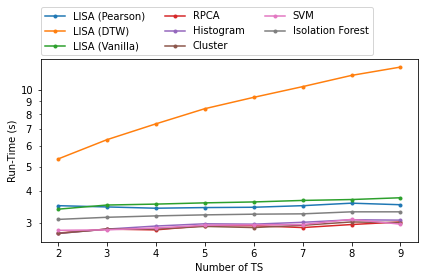

In [7]:
generate_timeit_line_chart(dimensions, scores)

In [2]:
dimension = np.array([2, 4, 6, 8, 10, 12, 14])

lisa_pearson_results = np.array([2.62, 2.59, 2.71, 2.79, 2.65, 2.66, 2.8])
lisa_dtw_results = np.array([3.88, 5.48, 6.62, 7.84, 9.16, 10.4, 12.1])
lisa_spatial_results = np.array([2.69, 2.72, 2.81, 2.88, 2.98, 3.08, 3.21])
rpca_results = np.array([2.64, 2.68, 2.66, 2.73, 2.63, 2.84, 2.86])
histogram_results = np.array([2.64, 2.66, 2.62, 2.68, 2.77, 2.86, 2.79])
cluster_results = np.array([2.64, 2.76, 2.65, 2.71, 2.73, 2.9, 2.9])
svm_results = np.array([2.55, 2.63, 2.66, 2.72, 2.73, 2.72, 2.83])
isolation_results = np.array([2.9, 2.88, 2.9, 2.9, 3, 3.03, 3.09])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [3]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Number of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

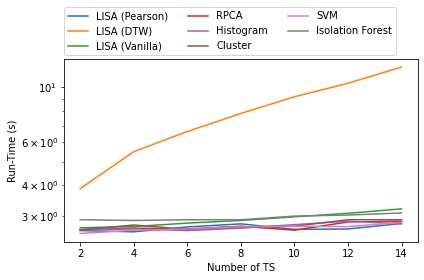

In [4]:
#PLOT
generate_timeit_line_chart(dimension, scores)
